# How well do jobs and skills pay for Data Analysts?

### Methology
- Evaluate median salary for top 6 data jobs
- Find median salary per skill for Data Analysts
- Visualize for highest paying skills and most demanded skills

## Import Libraries and Data

In [169]:
# Importing Libraries
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Salary Distribution for United States

### Salary Distribution by Job Title

Filter our data to only include salary values from the **United States**.

In [170]:
# filter for the job title and country
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

Create a list of the main `job_titles` in our dataset and filter our dataframe to only contain these job titles.

In [171]:
job_titles = df_US['job_title_short'].value_counts().head(6).index.tolist()

# filter the df for the top 6 job titles
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [172]:
# order the job titles by median salary
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

### Plot Salary Distributions
Plot the top 6 job titles salary distributions using a box plot.

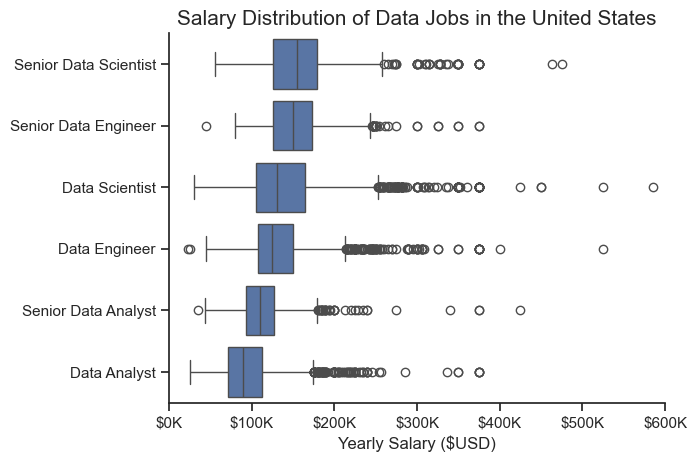

In [173]:
sns.set_theme(style='ticks')

sns.boxplot(data=df_US_top6,
            x = 'salary_year_avg',
            y = 'job_title_short',
            order = job_order)
sns.despine()
plt.xlim(0, 600000)
plt.title("Salary Distribution of Data Jobs in the United States", fontsize=15)
plt.xlabel("Yearly Salary ($USD)")
plt.ylabel("")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()


## Investigate Median Salary Vs Skill for Data Analysts in United States

Filters the original dataset to only get rows where the job title is `Data Analyst` and the country is 'United States', to create a new DataFrame `df_DA_US`. Drop `NaN` values from the `salary_year_avg` column.

Then it uses the `explode` method on the `job_skills` column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the salary_year_avg and job_skills columns.

In [174]:
# Only get data analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

# Explode the job_skills column
df_DA_US_explode = df_DA_US.explode('job_skills')

df_DA_US_explode[['salary_year_avg', 'job_skills']]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


### Determine The Highest Paid Skills and Most Demanded Skills

Gets the top ten highest-paying skills for `Data Analysts` by calculating the median salary for each skill listed in the `df_DA_US`. It groups the data by `job skills`, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame `df_DA_top_pay` with a reset index and a renamed salary column labeled `median_salary`.

In [175]:
df_DA_top_pay = df_DA_US_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


Calculates the count and median salary for each skill in `df_DA_US`. It groups the data by `job_skills`, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [176]:
df_DA_skills = df_DA_US_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


### Plot The Highest Paid Skills and Most Demanded Skills
Plot the The Highest Paid Skills and Most Demanded Skills using a horizontal bar charts.

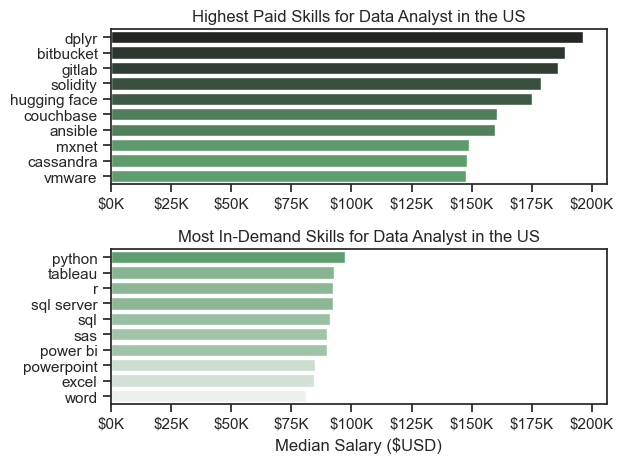

In [177]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

## Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay,
            x='median',
            y='job_skills',
            hue='median',
            palette='dark:g_r',
            ax=ax[0],
            legend=False)
ax[0].set_title("Highest Paid Skills for Data Analyst in the US")
ax[0].set_ylabel("")
ax[0].set_xlabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills,
            x='median',
            y='job_skills',
            hue='median',
            palette='light:g',
            ax=ax[1],
            legend=False)
ax[1].set_title("Most In-Demand Skills for Data Analyst in the US")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary ($USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()


## Salary Distribution for India

### Salary Distribution by Job Title

Filter our data to only include salary values from the **India**.

In [178]:
# filter for the job title and country
df_IND = df[df['job_country'] == 'India'].dropna(subset=['salary_year_avg'])

Create a list of the main `job_titles` in our dataset and filter our dataframe to only contain these job titles.

In [179]:
job_titles = df_IND['job_title_short'].value_counts().head(6).index.tolist()

job_titles

['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

But, we have to analysis the `Data Analyst`, `Data Engineer`, `Data Scientist`, and their senior roles to compare that with the United States data jobs.

So we create the job_list instead and then filter the `df_IND` dataframe with this `job_titles`.

In [180]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist', 'Senior Data Analyst', 'Senior Data Engineer', 'Senior Data Scientist']



In [181]:
# filter the df for the top 6 job titles
df_IND_job_titles = df_IND[df_IND['job_title_short'].isin(job_titles)]

In [182]:
# order the job titles by median salary
job_order = df_IND_job_titles.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_order

Index(['Senior Data Scientist', 'Data Engineer', 'Senior Data Engineer',
       'Data Scientist', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

Here, we do a trick to sort the `Senior Data Engineer` position from *third* to *second* to match the US box plot. 

In [183]:
# Convert to list for easy manipulation
sorted_list = list(job_order)

# Remove 'Senior Data Engineer' and insert it at the second position
sorted_list.remove('Senior Data Engineer')
sorted_list.insert(1, 'Senior Data Engineer')

# Convert back to an index if needed
job_order = pd.Index(sorted_list)

job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Engineer',
       'Data Scientist', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object')

### Plot Salary Distributions
Plot the `job_titles` salary distributions using a box plot.

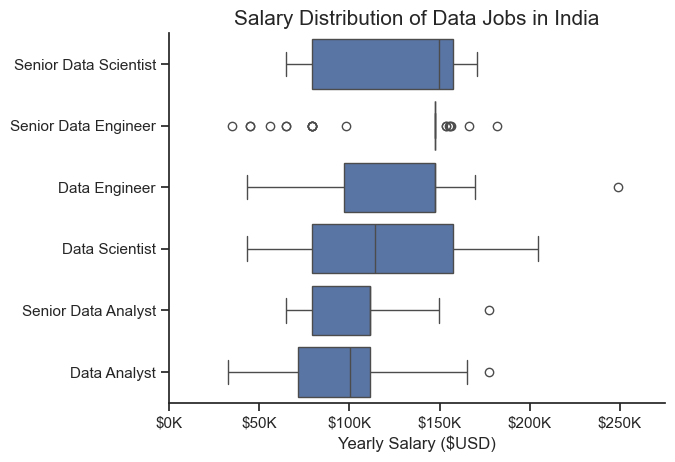

In [184]:
sns.set_theme(style='ticks')

sns.boxplot(data=df_IND_job_titles,
            x='salary_year_avg',
            y='job_title_short',
            order=job_order)
sns.despine()
plt.xlim(0, 275000)
plt.title("Salary Distribution of Data Jobs in India", fontsize=15)
plt.xlabel("Yearly Salary ($USD)")
plt.ylabel("")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts in Global Data Market

We excluded data from **India** because the number of data jobs with non-null values in `salary_year_avg` is very limited. Including this data could skew the analysis and lead to misleading conclusions.

we conducted our analysis using data from the global market to ensure more accurate and comprehensive insights.

Filters the original dataset to only get rows where the job title is `Data Analyst` and the country is 'India', to create a new DataFrame `df_DA_IND`. Drop `NaN` values from the `salary_year_avg` column.

Then it uses the `explode` method on the `job_skills` column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the `salary_year_avg` and `job_skills` columns.

In [185]:
# Only get data analyst jobs
df_DA_glo = df[(df['job_title_short'] == 'Data Analyst')]

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_glo = df_DA_glo.dropna(subset=['salary_year_avg'])

# Explode the job_skills column
df_DA_glo_explode = df_DA_glo.explode('job_skills')

df_DA_glo_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,sql,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,python,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,r,"{'analyst_tools': ['looker'], 'programming': [..."
785187,Data Analyst,Data Analyst,"Lisbon, Portugal",via Ai-Jobs.net,Full-time,False,Portugal,2023-06-07 06:30:33,False,False,Portugal,year,111175.0,NaN,Farfetch,looker,"{'analyst_tools': ['looker'], 'programming': [..."


### Determine The Highest Paid Skills and Most Demanded Skills

Gets the top ten highest-paying skills for `Data Analysts` by calculating the median salary for each skill listed in the `df_DA_US`. It groups the data by `job skills`, computes the median salary, sorts these values in descending order by median, and then selects the top 10. This is then formatted into a new DataFrame `df_DA_top_pay` with a reset index and a renamed salary column labeled `median_salary`.

In [186]:
df_DA_top_pay = df_DA_glo_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
svn,1,400000.0
solidity,1,179000.0
dplyr,3,167500.0
gitlab,7,163782.0
terraform,3,163782.0
couchbase,1,160515.0
datarobot,1,155485.5
golang,2,155000.0
mxnet,2,149000.0


Calculates the count and median salary for each skill in `df_DA_US`. It groups the data by `job_skills`, aggregates it to find the count and median salary for each skill, and then sorts the results by count in descending order by count. It re-sorts this subset by median salary in descending order.

In [187]:
df_DA_skills = df_DA_glo_explode.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1838,98500.0
tableau,1657,95000.0
r,1073,92527.5
sql,3079,92500.0
sql server,336,92150.0
power bi,1042,90000.0
sas,1006,90000.0
powerpoint,518,85000.0
excel,2135,84479.0


### Plot The Highest Paid Skills and Most Demanded Skills
Plot the The Highest Paid Skills and Most Demanded Skills using a horizontal bar charts.

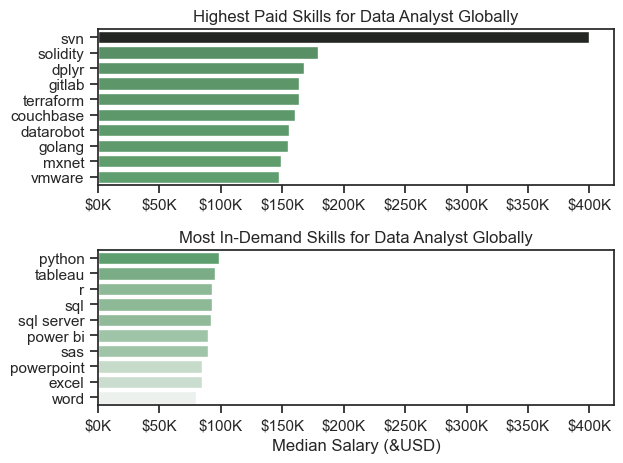

In [195]:
fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

sns.barplot(data=df_DA_top_pay,
            x='median',
            y='job_skills',
            hue='median',
            palette='dark:g_r',
            ax=ax[0], 
            legend=False)
ax[0].set_title("Highest Paid Skills for Data Analyst Globally")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

sns.barplot(data=df_DA_skills,
            x='median',
            y='job_skills',
            hue='median',
            palette='light:g',
            ax=ax[1],
            legend=False)
ax[1].set_title("Most In-Demand Skills for Data Analyst Globally")
ax[1].set_xlabel("Median Salary (&USD)")
ax[1].set_ylabel("")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()
plt.show()